In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('yc_essential_data.csv')

In [4]:
data.head()

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,batch,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID
0,370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,...,W06,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370
1,369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,...,W06,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369
2,367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,...,W06,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367
3,366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,...,W06,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366
4,372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,...,W06,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372


In [3]:
data = data[data.batch != 'Unspecified']

In [4]:
def get_season(batch: str):
    season = batch[0]
    year = "20" + batch[1:]
    return season

def get_year(batch: str):
    if batch.startswith("IK"):
        year = "20" + batch[2:]
    else:
        year = "20" + batch[1:]
    return year

In [5]:
data['year'] = data['batch'].apply(get_year)

In [8]:
data.head()

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID,year
0,370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,...,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370,2006
1,369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,...,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369,2006
2,367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,...,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367,2006
3,366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,...,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366,2006
4,372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,...,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372,2006


In [ ]:
import re
def clear_from_url(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

In [58]:
df = data[['long_description', 'year']]
df = df.dropna()
df['descr'] = df['long_description'].apply(clear_from_url)
df['len_descr'] = df.descr.apply(len)
df = df[df['len_descr'] > 50]
df['how_different_from_500'] = np.abs(df['len_descr'] - 500)

df = df.sort_values(by=['year'])

In [31]:
df.head(10)

,long_description,year,descr,len_descr,how_different_from_500
3490,What is Infogami?\n\nThe art of transforming d...,2005,What is Infogami?\n\nThe art of transforming d...,659,159
3485,Founded by Steve Huffman and Alexis Ohanian in...,2005,Founded by Steve Huffman and Alexis Ohanian in...,457,43
3486,Kiko is a web calendar for anyone who wants to...,2005,Kiko is a web calendar for anyone who wants to...,493,7
3487,ClickFacts is a Malware Software Solutions com...,2005,ClickFacts is a Malware Software Solutions com...,787,287
3488,"Founded in 2005, TextPayMe is an SMS payment s...",2005,"Founded in 2005, TextPayMe is an SMS payment s...",1110,610
3489,"Loopt, based in Silicon-Valley and backed by l...",2005,"Loopt, based in Silicon-Valley and backed by l...",474,26
3946,Read and listen without limits. Unlimited* aud...,2006,Read and listen without limits. Unlimited* aud...,683,183
3947,OMGPOP is a leading developer of social games ...,2006,OMGPOP is a leading developer of social games ...,327,173
3948,Xobni makes your inbox and address book smarte...,2006,Xobni makes your inbox and address book smarte...,454,46
3949,"A platform bridging mobile text messages, emai...",2006,"A platform bridging mobile text messages, emai...",347,153


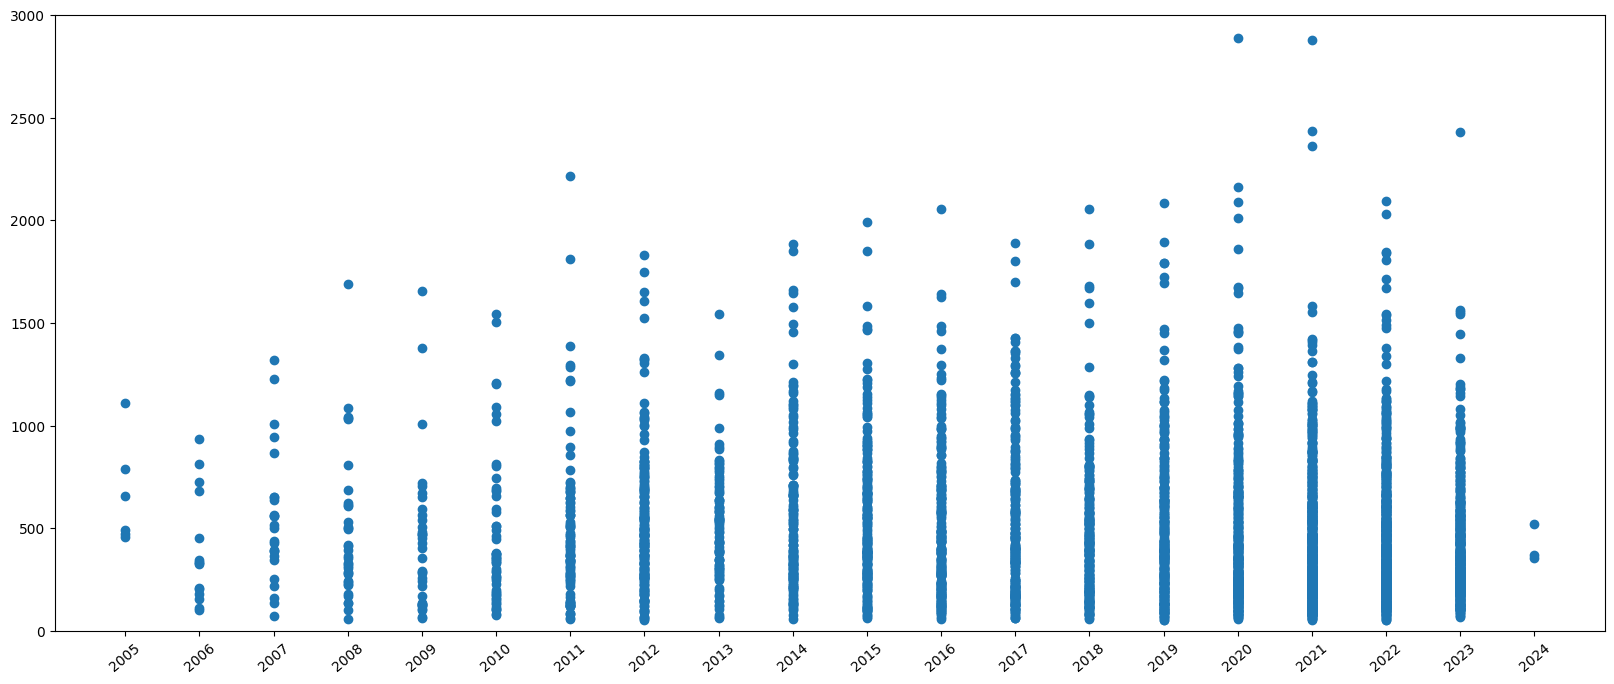

In [32]:
plt.figure(figsize=(20,8))
plt.scatter(df['year'], df['len_descr'])
plt.ylim(0, 3000)
plt.xticks(rotation=40);

In [17]:
mean_len_df = df.groupby("year").mean(numeric_only=True)
mean_len_df.reset_index(inplace=True)

Text(0.5, 1.0, 'Diff with 500')

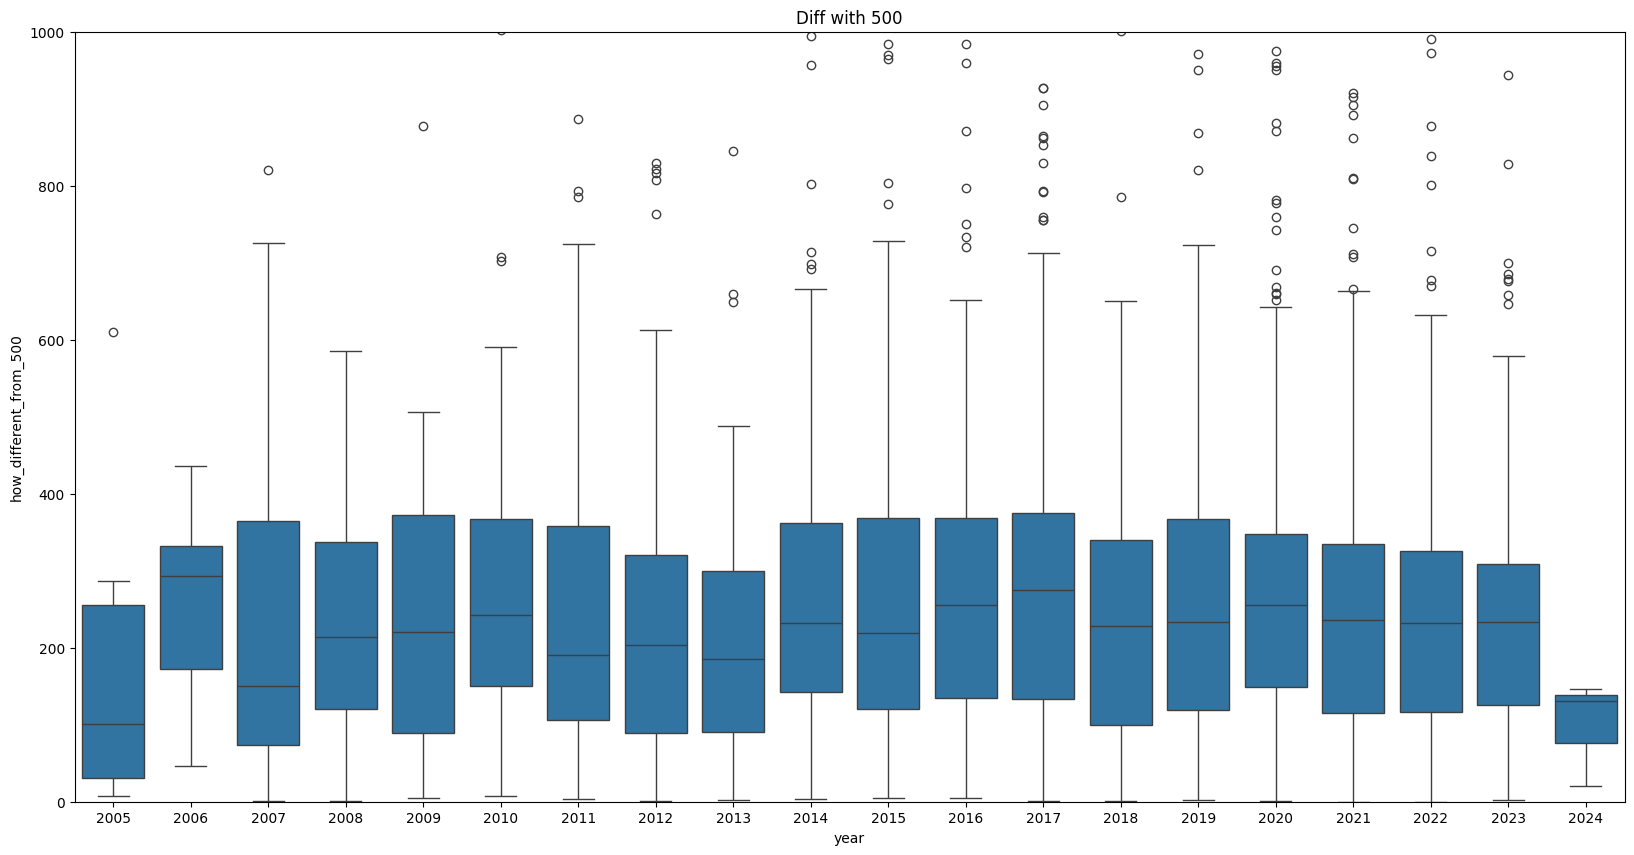

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="year", y="how_different_from_500", fill=True)
plt.ylim(0, 1000)
plt.title("Diff with 500")

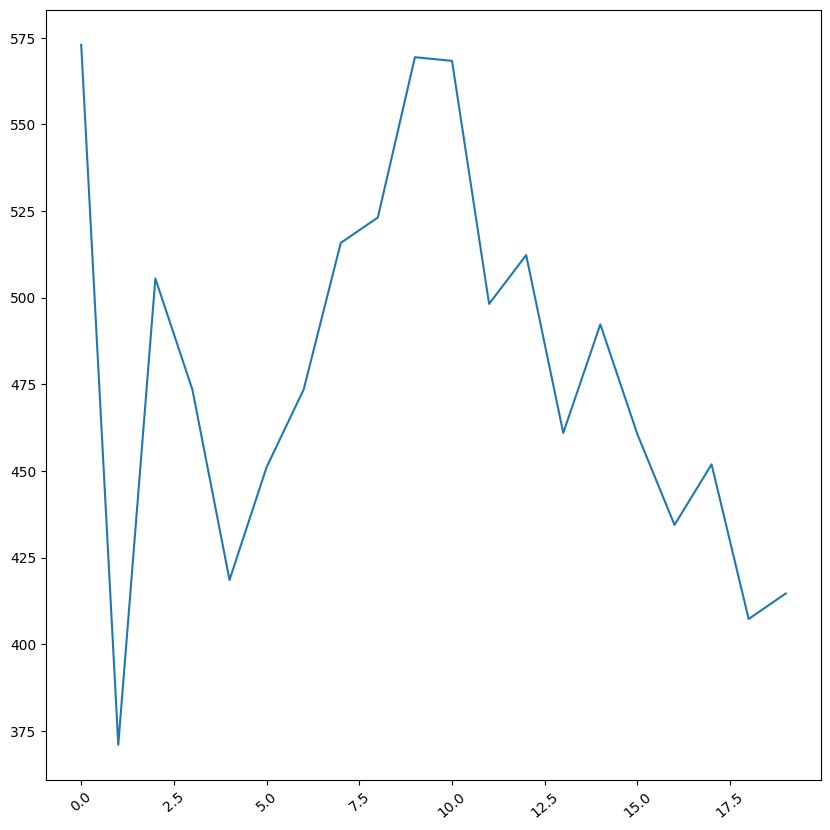

In [21]:
plt.figure(figsize=(10,10))
plt.plot(mean_len_df.index, mean_len_df['len_descr'])
plt.xticks(rotation=40);

(0.0, 2000.0)

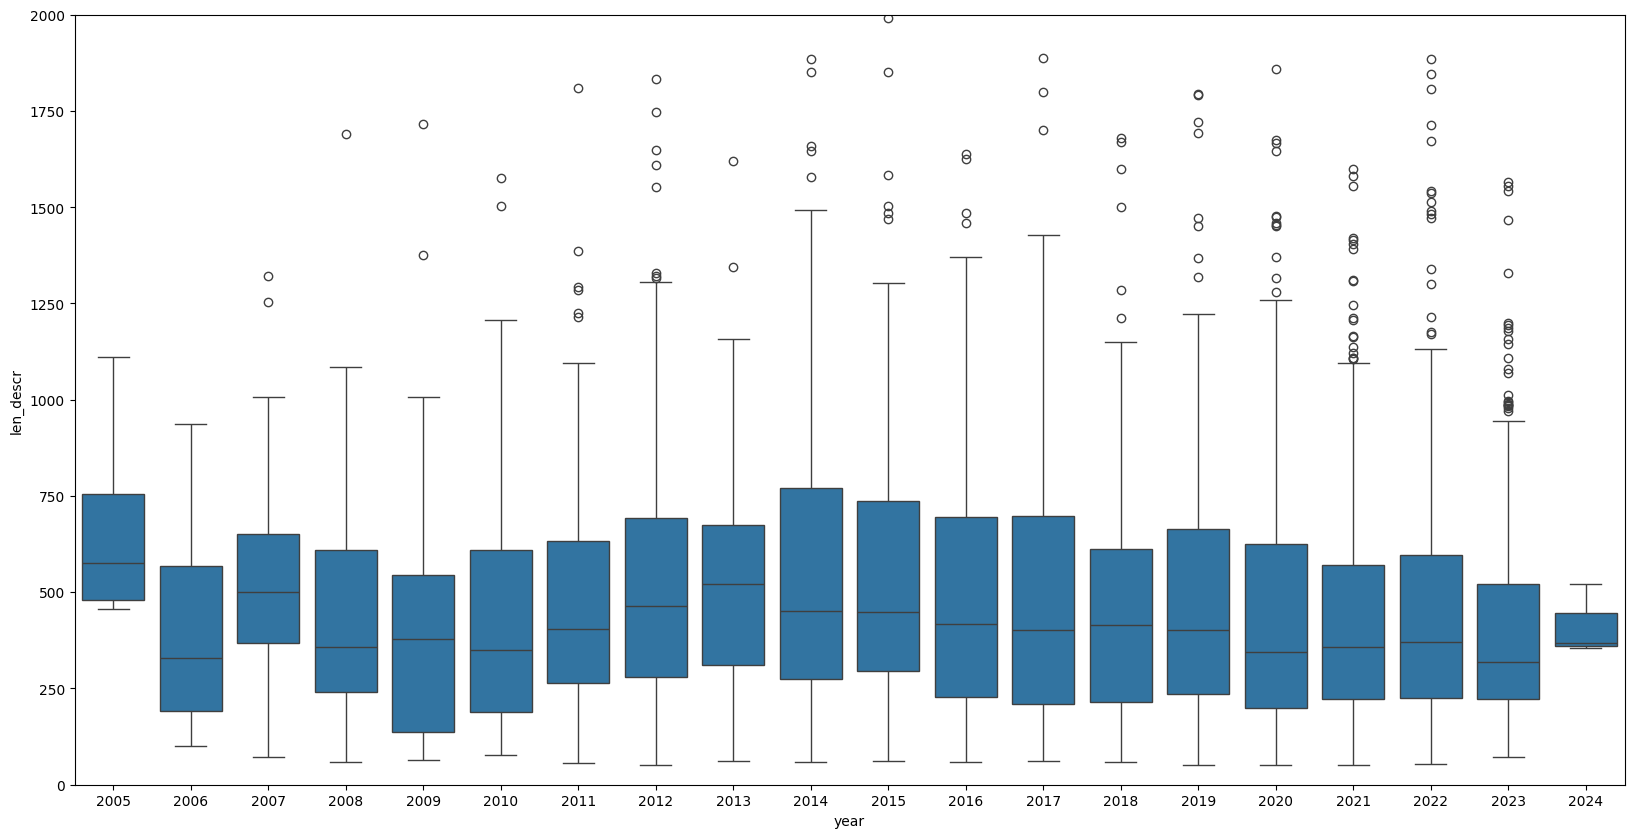

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="year", y="len_descr", fill=True)
plt.ylim(0, 2000)

Какого-т роста длины описаний с годами не наблюдается, зато видим больше "выбросов" с длинными описаниями

## Clustering

In [11]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [59]:
features = np.array(df['len_descr']).reshape(-1, 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [60]:
scaled_features

array([[ 0.54174324],
       [-0.04325196],
       [ 0.06100461],
       ...,
       [-0.34154159],
       [-0.29810136],
       [ 0.14209305]])

In [61]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10,  max_iter=300, random_state=42)

In [62]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [63]:
df['cluster'] = kmeans.labels_

In [41]:
df = df.sort_values(by=['len_descr'])

In [65]:
cluster_divide = df[df['cluster'] == 0].sort_values(by=['len_descr']).tail(1)['len_descr'].values[0]
print(cluster_divide)

633


(0.0, 2500.0)

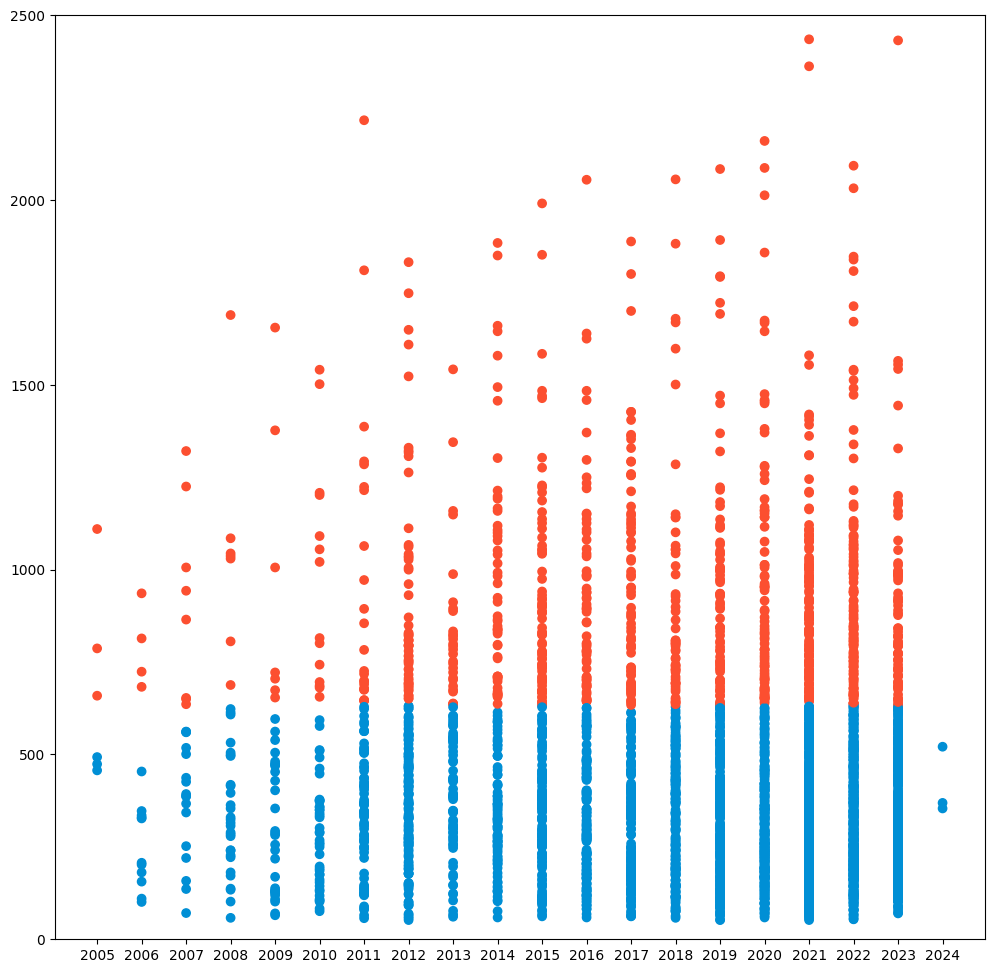

In [66]:
plt.figure(figsize=(12,12))
fte_colors = {
     0: "#008fd5",
     1: "#fc4f30",
     }
km_colors = [fte_colors[label] for label in kmeans.labels_]
plt.scatter(df['year'], df['len_descr'], c=km_colors)
plt.ylim(0, 2500)

In [67]:
short_descr = df[df['cluster'] == 0]
long_descr = df[df['cluster'] == 1]

In [68]:
short_descr_median = short_descr['len_descr'].median(numeric_only=True)
long_descr_median = long_descr['len_descr'].median(numeric_only=True)

In [69]:
print("Median for short descriptions = ", short_descr_median)
print("Median for long descriptions = ", long_descr_median)

Median for short descriptions =  299.0
Median for long descriptions =  841.0


In [73]:
short_descr_mean = short_descr['len_descr'].mean(numeric_only=True)
long_descr_mean = long_descr['len_descr'].mean(numeric_only=True)

In [74]:
print("Mean for short descriptions = ", short_descr_mean)
print("Mean for long descriptions = ", long_descr_mean)

Mean for short descriptions =  318.3046900623155
Mean for long descriptions =  949.4260958205913


(0.0, 2000.0)

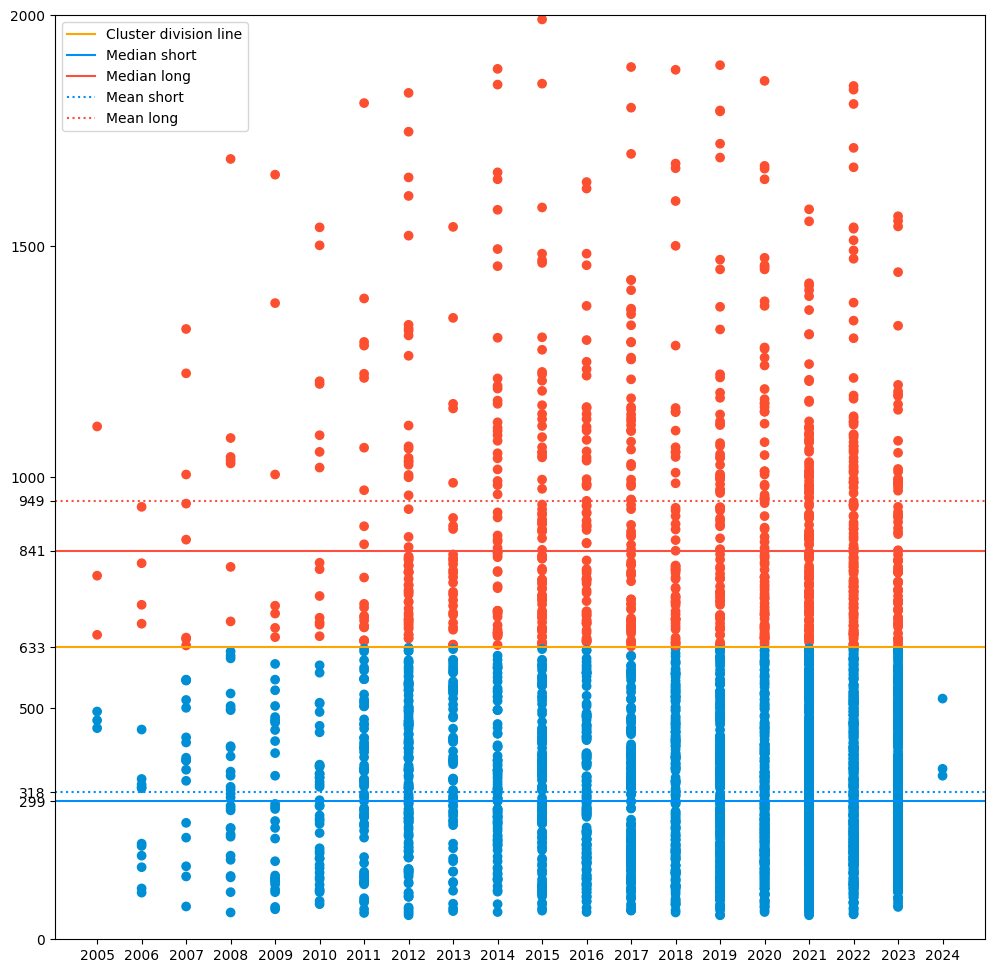

In [78]:
plt.figure(figsize=(12,12))
fte_colors = {
     0: "#008fd5",
     1: "#fc4f30",
     }
median_colors = {
     0: "#008ff8",
     1: "#fc4f40",
     }
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1 = plt.axes()
ax1.scatter(df['year'], df['len_descr'], c=km_colors)
ax1.axhline(cluster_divide, color='orange', label = 'Cluster division line')
ax1.axhline(short_descr_median, color=median_colors[0], label = 'Median short')
ax1.axhline(long_descr_median, color=median_colors[1], label='Median long')
ax1.axhline(short_descr_mean, color=median_colors[0], label = 'Mean short', linestyle=':')
ax1.axhline(long_descr_mean, color=median_colors[1], label='Mean long', linestyle=':')
ax1.set_yticks([0, short_descr_median, short_descr_mean, 500, cluster_divide, long_descr_median, long_descr_mean, 1000, 1500, 2000])
plt.legend(loc='best')
plt.ylim(0, 2000)